In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import seaborn as sns

In [2]:
import joblib

# Load the first model
model_path1 = "../models/random_forest_v1.joblib"
model1 = joblib.load(model_path1)

# Load the second model
model_path2 = "../models/random_forest_v2.joblib"
model2 = joblib.load(model_path2)

In [3]:
# test data is from processed-V1 not V2 as V2 is specialized and hence
# V1 models can not be used with V2 data
df = pd.read_csv("../../data/processed-v1.csv")
y = df["is_success"]
X = df.drop(columns=["is_success", "product_id"], axis=1)

In [4]:
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# filering data
X_test = X_test[X_test["os_name"] != 5]

In [6]:
# check accuracy of model 1
# Make predictions using model1
y_pred = model1.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Calculate precision score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

# Calculate recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy Score: 0.8307692307692308
Precision Score: 0.8181818181818182
Recall Score: 0.72
F1 Score: 0.7659574468085107


In [7]:
# to convert model 1 data for model 2 to use

In [8]:
# 1 battery type:
X_test["Battery type"] = X_test["Battery type"].replace([0, 1, 3], 0)
X_test["Battery type"] = X_test["Battery type"].replace([2, 4, 5], 1)

In [9]:
X_test["Battery type"].value_counts()

Battery type
0    43
1    22
Name: count, dtype: int64

In [10]:
encoding_mapping = {
    1: 2,
    2: 3,
    3: 4,
    4: 5,
    5: 6,
    6: 7,
    7: 8,
}

# Replace the values in the "Form factor" column using the mapping
df["Form factor"] = df["Form factor"].replace(encoding_mapping)

In [11]:
encoding_mapping = {6: 5, 7: 6}

# Replace the values in the "Form factor" column using the mapping
df["os_name"] = df["os_name"].replace(encoding_mapping)

In [12]:
X_test = X_test[
    [
        "mrp",
        "RAM",
        "Inbuilt Storage (in GB)",
        "Item Weight",
        "Battery Power (In mAH)",
        "Battery type",
        "Form factor",
        "length",
        "width",
        "height",
        "os_name",
        "os_version",
        "Phone Warranty (months)",
        "camera_count",
        "cam_has_AI",
        "cam_has_OIS",
        "cam_has_Zoom",
        "cam_has_HDR",
        "cam_has_Macro",
        "cam_has_Portrait",
        "main_camera_MP",
    ]
]

X_test.columns = [
    "mrp",
    "ram",
    "inbuilt_storage",
    "weight",
    "battery_power",
    "battery_type",
    "form_factor",
    "length",
    "width",
    "height",
    "os_name",
    "os_version",
    "phone_warranty (months)",
    "camera_count",
    "cam_has_AI",
    "cam_has_OIS",
    "cam_has_Zoom",
    "cam_has_HDR",
    "cam_has_Macro",
    "cam_has_Portrait",
    "main_camera_MP",
]

In [13]:
# check accuracy of model 1
# Make predictions using model1
y_pred2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy Score:", accuracy2)
precision2 = precision_score(y_test, y_pred2)
print("Precision Score:", precision2)
recall2 = recall_score(y_test, y_pred2)
print("Recall Score:", recall2)
f1_2 = f1_score(y_test, y_pred2)
print("F1 Score:", f1_2)

Accuracy Score: 0.9538461538461539
Precision Score: 0.9230769230769231
Recall Score: 0.96
F1 Score: 0.9411764705882353


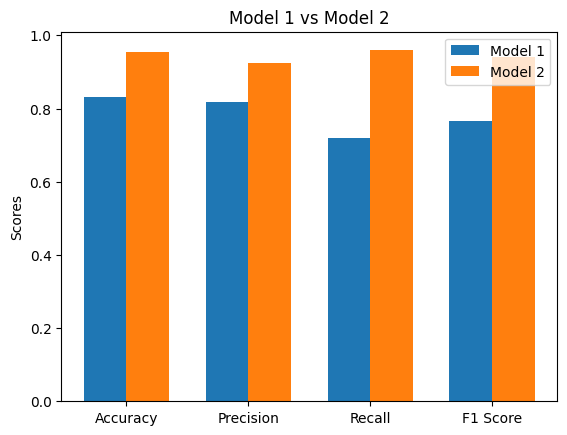

In [14]:
import matplotlib.pyplot as plt

labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
model1_scores = [accuracy, precision, recall, f1]
model2_scores = [accuracy2, precision2, recall2, f1_2]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, model1_scores, width, label="Model 1")
rects2 = ax.bar(x + width / 2, model2_scores, width, label="Model 2")

ax.set_ylabel("Scores")
ax.set_title("Model 1 vs Model 2")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set the y-axis limits to emphasize differences
ax.set_ylim([0.0, 1.01])

plt.show()

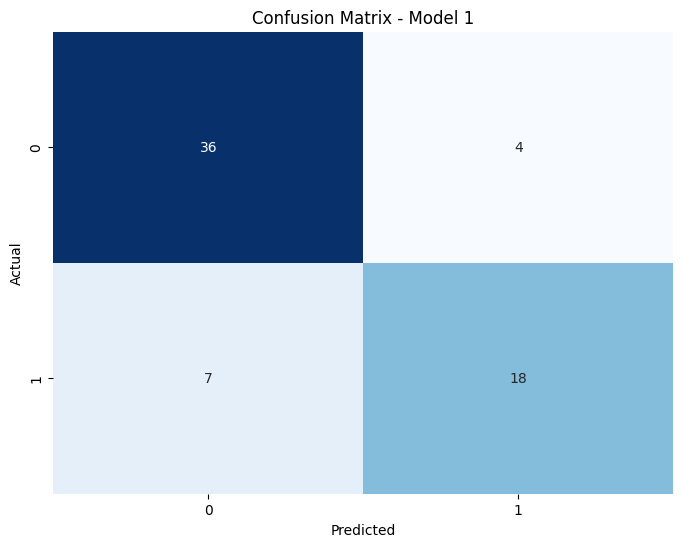

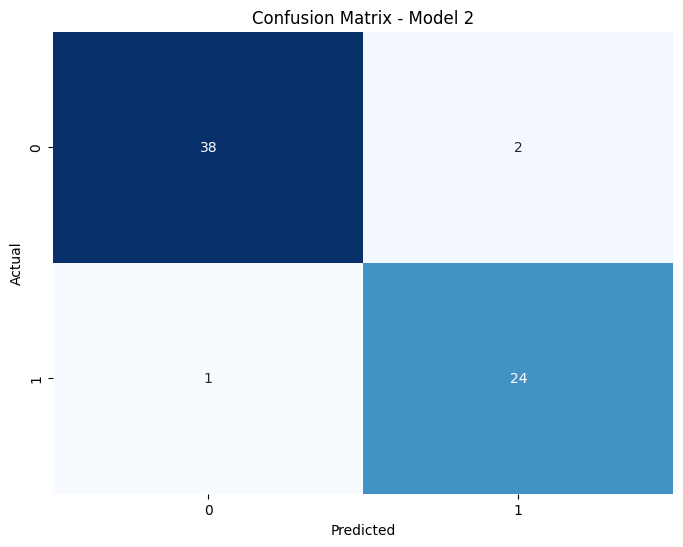

In [15]:
# Calculate confusion matrices for both models
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix for Model 1
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Model 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Model 2
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Model 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

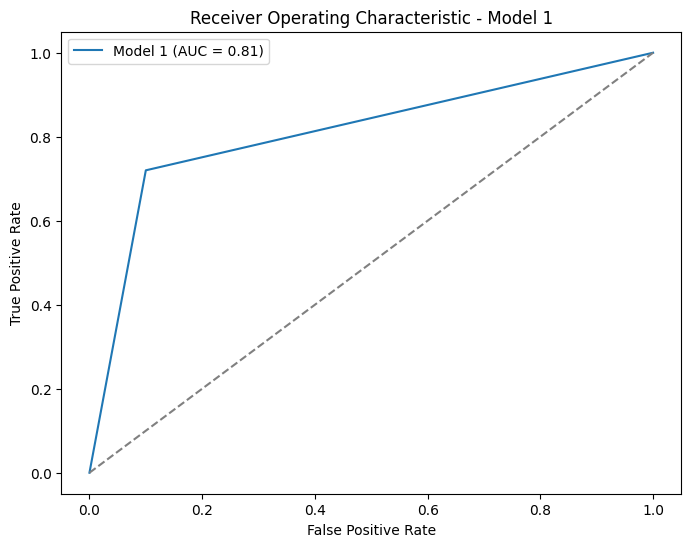

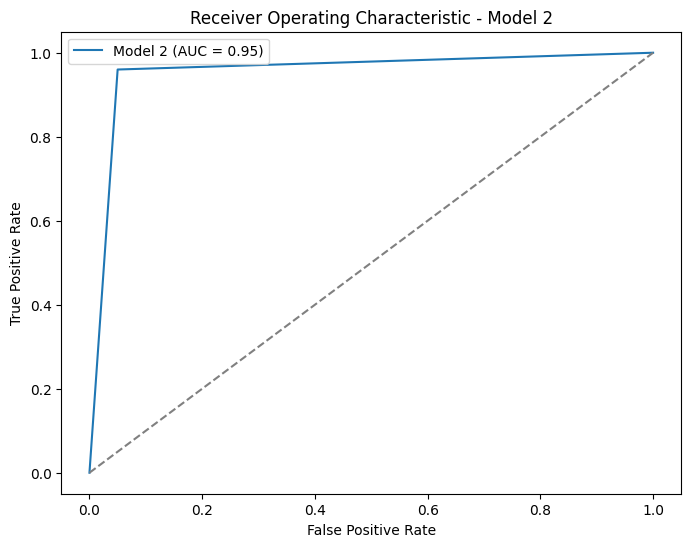

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve values for both models
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
fpr2, tpr2, _ = roc_curve(y_test, y_pred2)

# Calculate ROC AUC scores for both models
auc1 = roc_auc_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_pred2)

# Plot ROC curve for Model 1
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label="Model 1 (AUC = {:.2f})".format(auc1))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Receiver Operating Characteristic - Model 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot ROC curve for Model 2
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label="Model 2 (AUC = {:.2f})".format(auc2))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Receiver Operating Characteristic - Model 2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

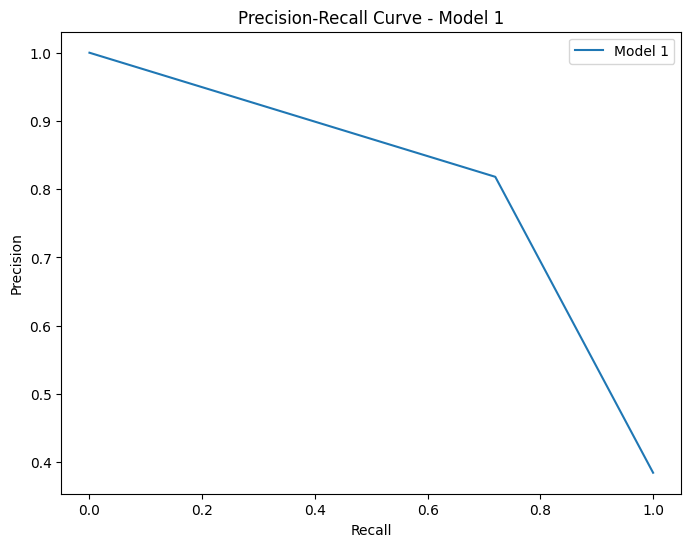

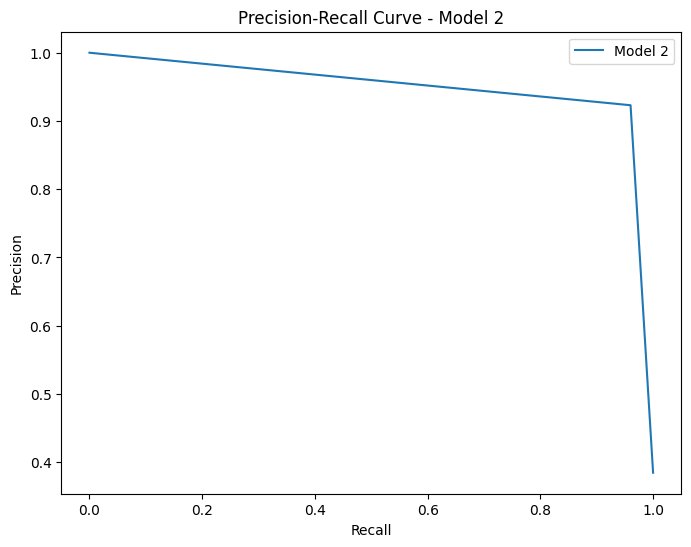

In [17]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve values for both models
precision1, recall1, _ = precision_recall_curve(y_test, y_pred)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred2)

# Plot precision-recall curve for Model 1
plt.figure(figsize=(8, 6))
plt.plot(recall1, precision1, label="Model 1")
plt.title("Precision-Recall Curve - Model 1")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Plot precision-recall curve for Model 2
plt.figure(figsize=(8, 6))
plt.plot(recall2, precision2, label="Model 2")
plt.title("Precision-Recall Curve - Model 2")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()